In [ ]:
from sklearn.datasets import fetch_openml

# Загрузка датасета
dataset = fetch_openml(name='students_scores', version=1)

# Вывод текстового описания датасета
print(dataset.DESCR)

# Определение целевой переменной и признаков
X = dataset.data  # признаки
y = dataset.target  # целевая переменная

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


This is a dataset about the actors and actresses that have
voice characters in Disney movies

Downloaded from openml.org.


In [6]:
import pandas as pd

# Создание DataFrame из данных
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# Добавление целевой переменной в DataFrame
df[dataset.target_names[0]] = dataset.target

# Вывод основной статистической информации
print("Число строк (объектов):", df.shape[0])
print("Число столбцов (признаков):", df.shape[1])
print("\nСтатистика по признакам:")
print(df.describe())
print("\nКоличество классов (значений целевой переменной):", len(df[dataset.target_names[0]].unique()))

Число строк (объектов): 1000
Число столбцов (признаков): 8

Статистика по признакам:
       math.score  reading.score  writing.score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Количество классов (значений целевой переменной): 2


In [8]:
missing_values = df.isnull().sum()
print("Пропущенные значения по признакам:")
print(missing_values)

# Проверка типов данных
data_types = df.dtypes
print("\nТипы данных по признакам:")
print(data_types)

Пропущенные значения по признакам:
race.ethnicity                 0
parental.level.of.education    0
lunch                          0
test.preparation.course        0
math.score                     0
reading.score                  0
writing.score                  0
gender                         0
dtype: int64

Типы данных по признакам:
race.ethnicity                  object
parental.level.of.education     object
lunch                           object
test.preparation.course         object
math.score                     float64
reading.score                  float64
writing.score                  float64
gender                          object
dtype: object


In [9]:
df

,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,gender
0,group B,bachelor's degree,standard,none,72.0,72.0,74.0,female
1,group C,some college,standard,completed,69.0,90.0,88.0,female
2,group B,master's degree,standard,none,90.0,95.0,93.0,female
3,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,male
4,group C,some college,standard,none,76.0,78.0,75.0,male
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88.0,99.0,95.0,female
996,group C,high school,free/reduced,none,62.0,55.0,55.0,male
997,group C,high school,free/reduced,completed,59.0,71.0,65.0,female
998,group D,some college,standard,completed,68.0,78.0,77.0,female


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_encoded

,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
0,1,1,1,1,52,44,50
1,2,4,1,0,49,62,64
2,1,3,1,1,70,67,69
3,0,0,0,1,27,29,20
4,2,4,1,1,56,50,51
...,...,...,...,...,...,...,...
995,4,3,1,0,68,70,71
996,2,2,0,1,42,27,31
997,2,2,0,0,39,43,41
998,3,4,1,0,48,50,53


Accuracy: 0.91

Таблица классификации:
              precision    recall  f1-score   support

      female       0.91      0.91      0.91        97
        male       0.91      0.91      0.91       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200


Матрица ошибок:


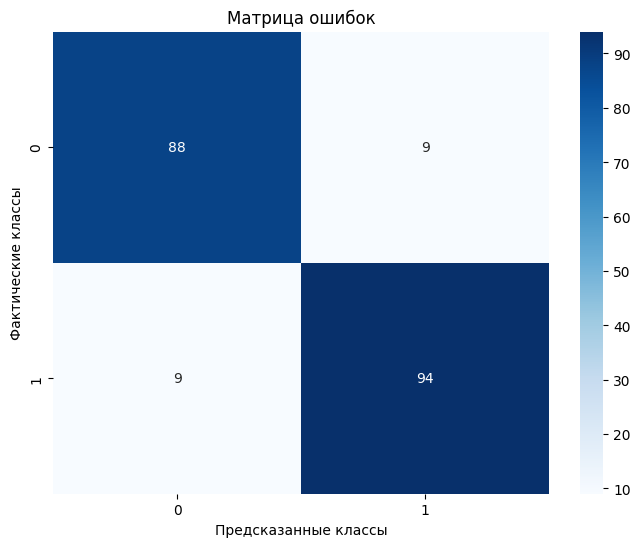

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предполагаем, что X и y уже определены
# Если нет, используйте X = df.drop('target', axis=1) и y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Расчет метрик accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вывод таблицы классификации
print("\nТаблица классификации:")
print(classification_report(y_test, y_pred))

# Вывод матрицы ошибок
print("\nМатрица ошибок:")

import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Фактические классы")
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предполагаем, что X и y уже определены
# Если нет, используйте X = df.drop('target', axis=1) и y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Попробуйте разные степени полинома и выберите лучшую
best_degree = None
best_accuracy = 0

for degree in range(1, 4):  # Пример: попробовать степени от 1 до 3
    # Создание полиномиальных признаков
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Инициализация и обучение модели логистической регрессии
    model = LogisticRegression()
    model.fit(X_poly_train, y_train)

    # Предсказания на тестовом наборе
    y_pred = model.predict(X_poly_test)

    # Расчет метрик accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Вывод результатов для текущей степени полинома
    print(f"\nСтепень полинома: {degree}")
    print("Accuracy:", accuracy)
    print("Таблица классификации:")
    print(classification_report(y_test, y_pred))

    # Сохранение лучшей степени
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_degree = degree

print("\nЛучшая степень полинома:", best_degree)


Степень полинома: 1
Accuracy: 0.91
Таблица классификации:
              precision    recall  f1-score   support

      female       0.91      0.91      0.91        97
        male       0.91      0.91      0.91       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200


Степень полинома: 2
Accuracy: 0.905
Таблица классификации:
              precision    recall  f1-score   support

      female       0.90      0.91      0.90        97
        male       0.91      0.90      0.91       103

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200


Степень полинома: 3
Accuracy: 0.93
Таблица классификации:
              precision    recall  f1-score   support

      female       0.92      0.94      0.93        97
        male       0.94      0.92      0.93       103

    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предполагаем, что X и y уже определены
# Если нет, используйте X = df.drop('target', axis=1) и y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели Перцептрон
model = Perceptron()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Расчет метрик accuracy
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Таблица классификации:")
print(classification_report(y_test, y_pred))

Accuracy: 0.905
Таблица классификации:
              precision    recall  f1-score   support

      female       0.88      0.94      0.91        97
        male       0.94      0.87      0.90       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



In [ ]:
import time
import pandas as pd

# Предполагаем, что X и y уже определены
# Если нет, используйте X = df.drop('target', axis=1) и y = df['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание списков для хранения результатов
models = ['Logistic Regression', 'Polynomial SVM', 'Linear SVM', 'RBF SVM', 'Perceptron']
accuracies = []
training_times = []

# Логистическая регрессия
start_time = time.time()
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
training_time_logistic = time.time() - start_time

accuracies.append(accuracy_logistic)
training_times.append(training_time_logistic)

# Полиномиальная SVM (лучшая степень определена в предыдущем шаге)
best_degree_poly = 2
poly_features = PolynomialFeatures(degree=best_degree_poly)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
start_time = time.time()
poly_svm_model = SVC(kernel='poly', degree=best_degree_poly)
poly_svm_model.fit(X_poly_train, y_train)
y_pred_poly_svm = poly_svm_model.predict(X_poly_test)
accuracy_poly_svm = accuracy_score(y_test, y_pred_poly_svm)
training_time_poly_svm = time.time() - start_time

accuracies.append(accuracy_poly_svm)
training_times.append(training_time_poly_svm)

# Линейная SVM
start_time = time.time()
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)
y_pred_linear_svm = linear_svm_model.predict(X_test)
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
training_time_linear_svm = time.time() - start_time

accuracies.append(accuracy_linear_svm)
training_times.append(training_time_linear_svm)

# RBF SVM
start_time = time.time()
rbf_svm_model = SVC(kernel='rbf')
rbf_svm_model.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm_model.predict(X_test)
accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm)
training_time_rbf_svm = time.time() - start_time

accuracies.append(accuracy_rbf_svm)
training_times.append(training_time_rbf_svm)

# Перцептрон
start_time = time.time()
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
training_time_perceptron = time.time() - start_time

accuracies.append(accuracy_perceptron)
training_times.append(training_time_perceptron)

# Создание DataFrame для итоговой таблицы
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Training Time (seconds)': training_times
})

# Вывод итоговой таблицы
print(results_df)
